## Contents

- Importing the required Libraries
- Understanding the Data
- Preprocessing Data for Classification
- Classification Models
    - Logistic Regression Classification
    - Decision Tree Classification
    - Gradient Boost Classification
    - Random Forest Classification
    - SVM
    - KNN
    - Neural Netowrk
- Preprocessing Data for Regression
- Regression Models
    - Lasso Regression
    - Decision Tree Regression
    - Gradient Boost Regression
    - Random Forest Regression

In [1]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import scikitplot as skplt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Custom logistic regression classifer
from models.LRC import LogisticRegressionClassifier
#Custom decision tree classifier
from models.decisiontrees import decisiontreeclassifier, decisiontreeregressor
#Custom random forest classifier
from models.random_forest import RandomForestClassifier, RandomForestRegressor
#Custom gradient boosting classifier
from models.gradientboosting import GradientBoostTreeClassifier, GradientBoostTreeRegressor
#Custom SVM
from models.SVM import SVM
#Custom KNN
from models.KNN.KNNClassifier import KNNClassifier
#Custom NN
from models.NN import NeuralNetwork
#Custom lasso regressor
from models.regression import LassoRegression



import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("e-shop clothing 2008.csv",delimiter = ';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [4]:
data['price 2'].value_counts()

1    84695
2    80779
Name: price 2, dtype: int64

In [5]:
data['price 2'].replace([2], [0], inplace=True)
data['price 2'].value_counts()

1    84695
0    80779
Name: price 2, dtype: int64

**Custom functions for calculating metrics**

In [6]:
#custom function to calculate accuracy score for classiciation model and R2 & RMSE for regression model.
def accuracy(actual,predicted,normalize=True):
    accuracy=[]
    for i in range(len(predicted)):
        if predicted[i]==actual[i]:
            accuracy.append(1)
        else:
            accuracy.append(0)
    if normalize==True:
        return np.mean(accuracy)
    if normalize==False:
        return sum(accuracy)
    
def r2score(actual, predicted):
    y_average = np.average(actual)
    rss = 0
    tss = 0
    for i in range(len(actual)):
        rss += (actual[i] - predicted[i])**2
        tss += (actual[i] - y_average)**2
        r2 = 1 - (rss/tss)
    return r2    
    
def mean_square(actual, predicted):
    diff=np.subtract(actual,predicted)
    square=np.square(diff)
    MSE=square.mean()
    RMSE=np.sqrt(MSE)
    return RMSE

## Classification of Price 2
**Preprocessing for Classification model**

In [7]:
#Defining dependent and independent variables
X = data.drop('price 2', axis=1)

Y = data["price 2"]
#storing column names of X in names
names = np.array(X.columns)

#Encoding the columns
def label_transform(x):
    le = LabelEncoder()
    Encoded_le = le.fit_transform(x)
    return Encoded_le

for x in names:
    X[x] = label_transform(X[x])
    
#Scaling data
SCX = StandardScaler().fit_transform(X)

#Splitting data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

#Splitting scaled data into train and test sets
SCX_train, SCX_test, SCY_train, SCY_test = train_test_split(SCX, Y, test_size=0.2, random_state=41)

**Logistice Regression Classifier**

In [8]:
#Logistic Regression Classifier
start = time.time()
LRC = LogisticRegressionClassifier()
LRC.fit(X_train.values, Y_train.values) 
end = time.time()
total_time = end - start
print("Runtime in seconds:", round(total_time,2))

Runtime in seconds: 3.58


Logistic Regression Classifier Accuracy on Train data: 51.07 %


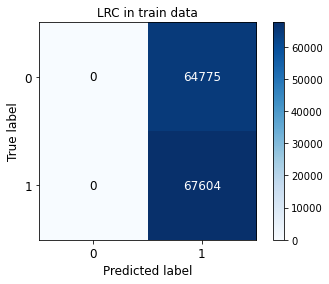

In [9]:
#Predicting results on Train Data
LRC_Y_train_pred = LRC.predict(X_train.values)
LRC_train_acc = accuracy(Y_train.values,LRC_Y_train_pred)
print('Logistic Regression Classifier Accuracy on Train data:',round(LRC_train_acc*100,2),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(Y_train, LRC_Y_train_pred, title="LRC in train data",
                text_fontsize='large')
plt.show()

Logistic Regression Classifier Accuracy on Test data: 51.64 %


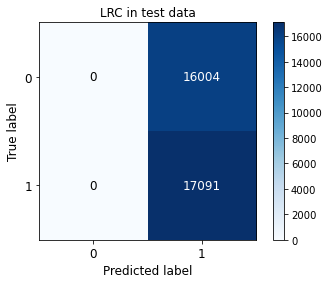

In [10]:
#Predicting results on Test Data
LRC_Y_test_pred = LRC.predict(X_test.values)
LRC_test_acc = accuracy(Y_test.values,LRC_Y_test_pred)
print('Logistic Regression Classifier Accuracy on Test data:',round(LRC_test_acc*100,2),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(Y_test, LRC_Y_test_pred, title="LRC in test data",
                text_fontsize='large')
plt.show()

In [11]:
#identifying important features of LRC
LRCImportantfeatures = pd.DataFrame(data={'feature': X_train.columns})
LRCImportantfeatures["importance"] = pd.DataFrame(LRC.w)
LRCImportantfeatures = LRCImportantfeatures.sort_values(by='importance', ascending=False)
LRCImportantfeatures

,feature,importance
7,page 2 (clothing model),2.587970
5,session ID,2.502849
11,price,1.276730
8,colour,0.138294
6,page 1 (main category),0.066499
1,month,0.004877
0,year,0.000000
10,model photography,-0.017947
12,page,-0.020902
3,order,-0.070037


**Decision Tree Classifier**

In [12]:
#Decision Tree classifier
start = time.time()
DTC = decisiontreeclassifier()
DTC.fit(X_train,Y_train.values.reshape(-1,1))
end = time.time()
total_time = end - start
print("Runtime in seconds:", round(total_time,2))

Runtime in seconds: 38547.88


In [14]:
print('\033[1;3m',"Structure of decision tree",'\033[0m')
DTC.print_tree()

 Structure of decision tree 
|- price <= 7 :Information Gain 0.2825
 left:|- page 1 (main category) <= 2 :Information Gain 0.0884
  left:|- price <= 6 :Information Gain 0.0179
    left:0
    right:|- page 1 (main category) <= 1 :Information Gain 0.3455
        left:0
        right:1
  right:|- price <= 5 :Information Gain 0.4999
    left:0
    right:1
 right:|- colour <= 0 :Information Gain 0.009
  left:|- page 1 (main category) <= 0 :Information Gain 0.4703
    left:1
    right:0
  right:|- location <= 4 :Information Gain 0.0014
    left:1
    right:|- colour <= 1 :Information Gain 0.0338
        left:1
        right:1


Decision Tree Classifier Accuracy on Train data: 99.61 %


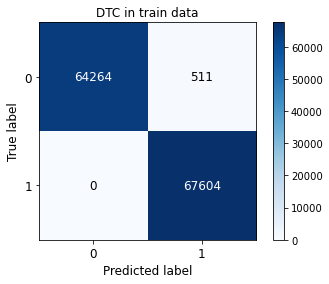

In [15]:
#Predicting results on Train Data
DTC_Y_train_pred = DTC.predict(X_train.values)
DTC_train_acc = accuracy(Y_train.values,DTC_Y_train_pred)
print('Decision Tree Classifier Accuracy on Train data:',round(DTC_train_acc*100,2),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(Y_train, DTC_Y_train_pred, title="DTC in train data",
                text_fontsize='large')
plt.show()

Decision Tree Classifier Accuracy on Test data: 99.64 %


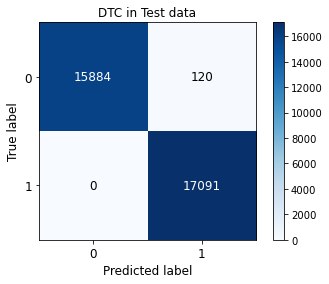

In [16]:
#Predicting results on Test Data
DTC_Y_test_pred = DTC.predict(X_test.values)
DTC_test_acc = accuracy(Y_test.values,DTC_Y_test_pred)
print('Decision Tree Classifier Accuracy on Test data:',round(DTC_test_acc*100,2),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(Y_test, DTC_Y_test_pred, title="DTC in Test data",
                text_fontsize='large')
plt.show()

In [17]:
#important features of decision tree
dtFeatures = pd.DataFrame(DTC.get_features())
dtFeatures.columns = ['featurename','treelevel']
dtFeatures = dtFeatures.drop_duplicates()
dtFeatures=dtFeatures.sort_values('treelevel')
dtFeatures

,featurename,treelevel
8,price,0
3,page 1 (main category),1
7,colour,1
1,price,2
4,page 1 (main category),2
6,location,2
0,page 1 (main category),3
5,colour,3


**Random Forest Classifier**

In [18]:
start = time.time()
#create a random forest with default values
RFC = RandomForestClassifier()
## train the ensemble
RFC.fit(X_train.values,Y_train.values)
end = time.time()
total_time = end - start
print("Runtime in seconds:", round(total_time,2))

Runtime in seconds: 34566.85


Random Forest Classifier Accuracy on Train data: 100.0 %


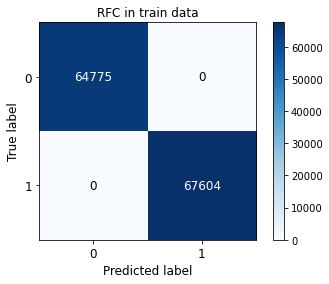

In [19]:
#Predicting results on Train Data
RFC_Y_train_pred = RFC.predict(X_train.values)
RFC_train_acc = accuracy(Y_train.values,RFC_Y_train_pred)
print('Random Forest Classifier Accuracy on Train data:',round(RFC_train_acc*100,2),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(Y_train, RFC_Y_train_pred, title="RFC in train data",
                text_fontsize='large')
plt.show()

Random Forest Classifier Accuracy on Test data: 100.0 %


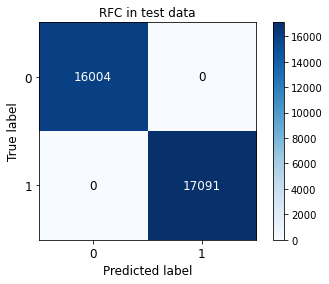

In [20]:
#Predicting results on Test Data
RFC_Y_test_pred = RFC.predict(X_test.values)
RFC_test_acc = accuracy(Y_test.values,RFC_Y_test_pred)
print('Random Forest Classifier Accuracy on Test data:',round(RFC_test_acc*100,2),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(Y_test, RFC_Y_test_pred, title="RFC in test data",
                text_fontsize='large')
plt.show()

**Gradient Boost**

In [21]:
start = time.time()
GBC = GradientBoostTreeClassifier() 
#fit the model
GBC.fit(X_train.values,Y_train.values)
end = time.time()
total_time = end - start
print("Runtime in seconds:", round(total_time,2))

Runtime in seconds: 68807.02


GradientBoost Classifier Accuracy on Train data: 51.07 %


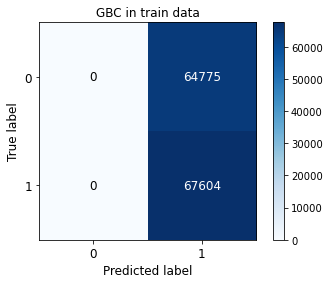

In [22]:
#Predicting results on Train Data
GBC_Y_train_pred = GBC.predict(X_train.values)
GBC_train_acc = accuracy(Y_train.values,GBC_Y_train_pred)
print('GradientBoost Classifier Accuracy on Train data:',round(GBC_train_acc*100,2),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(Y_train, GBC_Y_train_pred, title="GBC in train data",
                text_fontsize='large')
plt.show()

GradientBoost Classifier Accuracy on Test data: 51.64 %


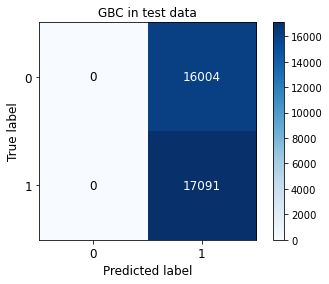

In [23]:
#Predicting results on Test Data
GBC_Y_test_pred = GBC.predict(X_test.values)
GBC_test_acc = accuracy(Y_test.values,GBC_Y_test_pred)
print('GradientBoost Classifier Accuracy on Test data:',round(GBC_test_acc*100,2),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(Y_test, GBC_Y_test_pred, title="GBC in test data",
                text_fontsize='large')
plt.show()

**Support Vector Machine**

In [24]:
#Fitting svm model to the data
start = time.time()
SVM = SVM()
SVM.fit(X_train.values, Y_train.values)
end = time.time()
total_time = end - start
print("Runtime in seconds:", round(total_time,2))

Runtime in seconds: 6359.24


SVM Classifier Accuracy on Train data: 51.12 %


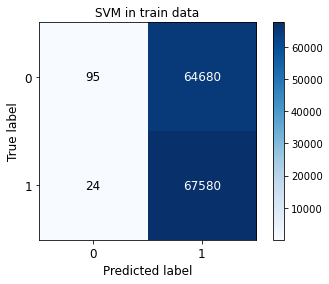

In [25]:
#Predicting results on Train Data
SVM_Y_train_pred = SVM.predict(X_train.values)
SVM_train_acc = accuracy(Y_train.values,SVM_Y_train_pred)
print('SVM Classifier Accuracy on Train data:',round(SVM_train_acc*100,2),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(Y_train, SVM_Y_train_pred, title="SVM in train data",
                text_fontsize='large')
plt.show()

SVM Classifier Accuracy on Test data: 51.71 %


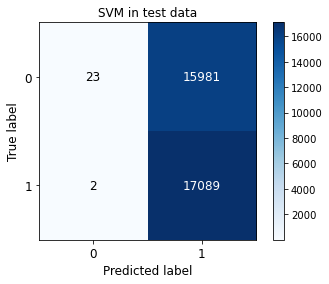

In [26]:
#Predicting results on Test Data
SVM_Y_test_pred = SVM.predict(X_test.values)
SVM_test_acc = accuracy(Y_test.values,SVM_Y_test_pred)
print('SVM Classifier Accuracy on Test data:',round(SVM_test_acc*100,2),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(Y_test, SVM_Y_test_pred, title="SVM in test data",
                text_fontsize='large')
plt.show()

**K-Nearest Neighbor**

In [27]:
#fitting the KNN model to the dataset
start = time.time()
KNN = KNNClassifier(K=5, metric='minkowski', p=2)
KNN.fit(X_train.values, Y_train.values)
end = time.time()
total_time = end - start
print("Runtime in seconds:", round(total_time,2))

Runtime in seconds: 0.0


KNN Classifier Accuracy on Train data: 49.18 %


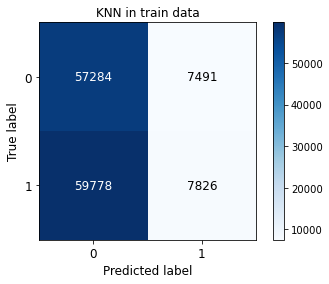

In [28]:
#Predicting results on Train Data
KNN_Y_train_pred = KNN._generate_predictions(X_train.values)
KNN_train_acc = accuracy(Y_train.values,KNN_Y_train_pred)
print('KNN Classifier Accuracy on Train data:',round(KNN_train_acc*100,2),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(Y_train, KNN_Y_train_pred, title="KNN in train data",
                text_fontsize='large')
plt.show()

KNN Classifier Accuracy on Test data: 48.64 %


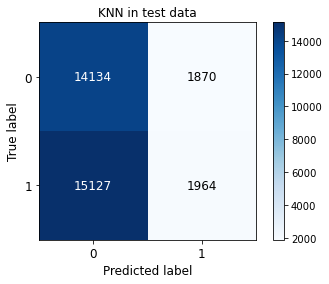

In [29]:
#Predicting results on Test Data
KNN_Y_test_pred = KNN._generate_predictions(X_test.values)
KNN_test_acc = accuracy(Y_test.values,KNN_Y_test_pred)
print('KNN Classifier Accuracy on Test data:',round(KNN_test_acc*100,2),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(Y_test, KNN_Y_test_pred, title="KNN in test data",
                text_fontsize='large')
plt.show()

**Neural Netowrk**

In [8]:
#model with SGDM optimizer
start = time.time()
nnsgdm = NeuralNetwork(layers=[13,10,1],activation_function="sigmoid",optimization="SGDM", learning_rate=0.0001, iterations=150)
nnsgdm.fit(SCX_train, SCY_train.values.reshape(SCX_train.shape[0], 1)) #train the model
end = time.time()
total_time = end - start
print("Runtime in seconds:", round(total_time,2))


Runtime in seconds: 3.67


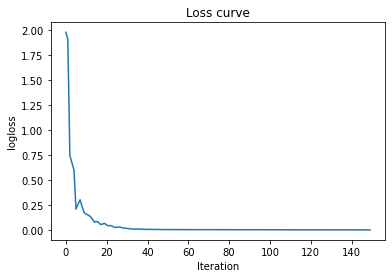

In [9]:
nnsgdm.plot_loss()

Neural Network Classifier Accuracy on Train data: 100 %


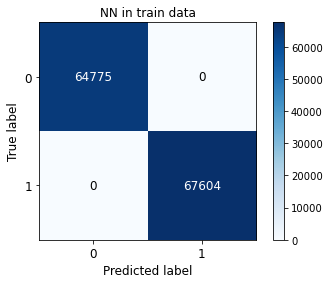

In [10]:
#Predicting results on Train Data
NN_Y_train_pred = nnsgdm.predict(SCX_train)
print("Neural Network Classifier Accuracy on Train data: {}".format(nnsgdm.acc(SCY_train.values.reshape(SCX_train.shape[0], 1), NN_Y_train_pred)),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(SCY_train, NN_Y_train_pred, title="NN in train data",
                text_fontsize='large')
plt.show()

Neural Network Classifier Accuracy on Test data: 100 %


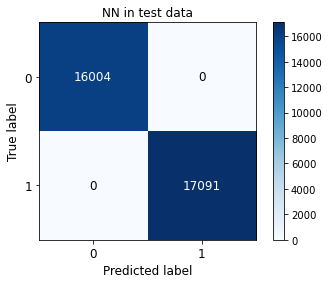

In [12]:
#Predicting results on Test Data
NN_Y_test_pred = nnsgdm.predict(SCX_test)
print("Neural Network Classifier Accuracy on Test data: {}".format(nnsgdm.acc(SCY_test.values.reshape(SCX_test.shape[0], 1), NN_Y_test_pred)),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(SCY_test, NN_Y_test_pred, title="NN in test data",
                text_fontsize='large')
plt.show()

## Regression on Price
**Preprocessing for Regression model**

In [13]:
#Defining dependent and independent variables
RX = data.drop('price', axis=1)

RY = data["price"]
#storing column names of X in names
names = np.array(RX.columns)

#Encoding the columns
def label_transform(x):
    le = LabelEncoder()
    Encoded_le = le.fit_transform(x)
    return Encoded_le

for x in names:
    RX[x] = label_transform(RX[x])
    
#Scaling data
RSCX = StandardScaler().fit_transform(RX)

#Splitting data into train and test sets
RX_train, RX_test, RY_train, RY_test = train_test_split(RX, RY, test_size=0.2, random_state=41)

#Splitting scaled data into train and test sets
RSCX_train, RSCX_test, RSCY_train, RSCY_test = train_test_split(RSCX, RY, test_size=0.2, random_state=41)

**Lasso Regression**

In [14]:
#Lasso Regression
start = time.time()
lasso = LassoRegression(alpha=0.1)
lasso.fit(RSCX_train, RY_train) 
end = time.time()
total_time = end - start
print("Runtime in seconds:", round(total_time,2))

Runtime in seconds: 1.4


In [15]:
#predicting for train data
lasso_train_pred = lasso.predict(RSCX_train)
lasso_train_r2 = r2score(RY_train.values,lasso_train_pred)
lasso_train_rmse = mean_square(RY_train.values,lasso_train_pred)
print("Lasso regression on Train data : ")
print("R²   :", round(lasso_train_r2*100,2),'%')
print("RMSE :", round(lasso_train_rmse,4))

Lasso regression on Train data : 
R²   : 78.44 %
RMSE : 5.8279


In [16]:
#predicting for test data
lasso_test_pred = lasso.predict(RSCX_test)
lasso_test_r2 = r2score(RY_test.values,lasso_test_pred)
lasso_test_rmse = mean_square(RY_test.values,lasso_test_pred)
print("Lasso regression on Test data : ")
print("R²   :", round(lasso_test_r2*100,2),'%')
print("RMSE :", round(lasso_test_rmse,4))

Lasso regression on Test data : 
R²   : 78.52 %
RMSE : 5.8081


**Decision Tree Regressor**

In [17]:
#Decision Tree classifier
start = time.time()
DTR = decisiontreeregressor()
DTR.fit(RX_train,RY_train.values.reshape(-1,1))
end = time.time()
total_time = end - start
print("Runtime in seconds:", round(total_time,2))

Runtime in seconds: 19012.94


In [18]:
print('\033[1;3m',"Structure of decision tree",'\033[0m')
DTR.print_tree()

 Structure of decision tree 
|- price 2 <= 0 :Variance Red 87.1245
 left-->|- page 1 (main category) <= 1 :Variance Red 19.1527
  left-->|- page 2 (clothing model) <= 7 :Variance Red 8.0938
    left-->33.1778
    right-->39.6877
  right-->|- page 2 (clothing model) <= 122 :Variance Red 1.827
    left-->27.5496
    right-->30.2955
 right-->|- page 2 (clothing model) <= 66 :Variance Red 59.5545
  left-->|- page 2 (clothing model) <= 48 :Variance Red 11.0163
    left-->64.1903
    right-->57.1638
  right-->|- page 1 (main category) <= 2 :Variance Red 15.4566
    left-->49.6655
    right-->41.7295


In [19]:
#Predicting results on Train Data
DTR_RY_train_pred = DTR.predict(RX_train.values)
DTR_train_r2 = r2score(RY_train.values,DTR_RY_train_pred)
DTR_train_rmse = mean_square(RY_train.values,DTR_RY_train_pred)
print('Decision Tree Regressor on Train data:')
print('R²   : ',round(DTR_train_r2*100,2),'%')
print('RMSE : ',round(DTR_train_rmse,4))

Decision Tree Regressor on Train data:
R²   :  86.63 %
RMSE :  4.5897


In [20]:
#Predicting results on Test Data
DTR_RY_test_pred = DTR.predict(RX_test.values)
DTR_test_r2 = r2score(RY_test.values,DTR_RY_test_pred)
DTR_test_rmse = mean_square(RY_test.values,DTR_RY_test_pred)
print('Decision Tree Regressor on Test data:')
print('R²   : ',round(DTR_test_r2*100,2),'%')
print('RMSE : ',round(DTR_test_rmse,4))

Decision Tree Regressor on Test data:
R²   :  86.74 %
RMSE :  4.5638


**Random Forest Regression**

In [21]:
start = time.time()
#create a random forest with default values
RFR = RandomForestRegressor()
## train the ensemble
RFR.fit(RX_train.values,RY_train.values)
end = time.time()
total_time = end - start
print("Runtime in seconds:", round(total_time,2))

Runtime in seconds: 53496.19


In [22]:
#Predicting results on Train Data
RFR_RY_train_pred = RFR.predict(RX_train.values)
RFR_train_r2 = r2score(RY_train.values,RFR_RY_train_pred)
RFR_train_rmse = mean_square(RY_train.values,RFR_RY_train_pred)
print('Random Forest Regressor on Train data:')
print('R²   : ',round(RFR_train_r2*100,2),'%')
print('RMSE : ',round(RFR_train_rmse,4))

Random Forest Regressor on Train data:
R²   :  99.82 %
RMSE :  0.526


In [23]:
#Predicting results on Test Data
RFR_RY_test_pred = RFR.predict(RX_test.values)
RFR_test_r2 = r2score(RY_test.values,RFR_RY_test_pred)
RFR_test_rmse = mean_square(RY_test.values,RFR_RY_test_pred)
print('Random Forest Regressor on Test data:')
print('R²   : ',round(RFR_test_r2*100,2),'%')
print('RMSE : ',round(RFR_test_rmse,4))

Random Forest Regressor on Test data:
R²   :  99.81 %
RMSE :  0.5525


**Gradient Boost Regression**

In [24]:
start = time.time()
GBR = GradientBoostTreeRegressor()
#fit the model
GBR.fit(RX_train.values,RY_train.values)
end = time.time()
total_time = end - start
print("Runtime in seconds:", round(total_time,2))

Runtime in seconds: 7529.78


In [25]:
#Predicting results on Train Data
GBR_RY_train_pred = GBR.predict(RX_train.values)
GBR_train_r2 = r2score(RY_train.values,GBR_RY_train_pred)
GBR_train_rmse = mean_square(RY_train.values,GBR_RY_train_pred)
print('GradientBoost Regressor on Train data:')
print('R²   : ',round(GBR_train_r2*100,2),'%')
print('RMSE : ',round(GBR_train_rmse,4))

GradientBoost Regressor on Train data:
R²   :  -95.31 %
RMSE :  17.5418


In [26]:
#Predicting results on Test Data
GBR_RY_test_pred = GBR.predict(RX_test.values)
GBR_test_r2 = r2score(RY_test.values,GBR_RY_test_pred)
GBR_test_rmse = mean_square(RY_test.values,GBR_RY_test_pred)
print('GradientBoost Regressor on Test data:')
print('R²   : ',round(GBR_test_r2*100,2),'%')
print('RMSE : ',round(GBR_test_rmse,4))

GradientBoost Regressor on Test data:
R²   :  -96.63 %
RMSE :  17.5733
